## pyRootHair Paper Plots
### Author: Ian Tsang

### Imports

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
import numpy as np
import imageio.v3 as iio

from statsmodels.nonparametric.smoothers_lowess import lowess
from skimage.color import rgb2gray
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.stats import linregress
from matplotlib.gridspec import GridSpec

plt.style.use(['science', 'no-latex'])
plt.rcParams['font.size'] = 20


### Figure 2 - Wheat Demo

In [ ]:
# Images
claire_raw = iio.imread('claire_0015.png')
claire_mask = iio.imread('claire_0015_mask.png')
claire_mask = rgb2gray(claire_mask[:,:,:3]) # convert mask to grayscale

In [ ]:
# DataFrames
claire_raw = pd.read_csv('Claire_raw.csv')
claire_summary = pd.read_csv('Claire_summary.csv')

# subset for specific image
claire15_raw = claire_raw[claire_raw['Name'] == 'claire_0015']
claire15_summary = claire_summary[claire_summary['Name'] == 'claire_0015']

# calculate average rhl
claire15_raw['Avg RHL'] = claire15_raw.loc[:, ['RHL 1', 'RHL 2']].mean(axis=1)

# calculate lowess regression lines
line1 = lowess(claire15_raw['RHL 1'], claire15_raw['Distance From Root Tip (mm)'], frac=0.1)
line2 = lowess(claire15_raw['RHL 2'], claire15_raw['Distance From Root Tip (mm)'], frac=0.1)
avg = lowess(claire15_raw['Avg RHL'], claire15_raw['Distance From Root Tip (mm)'], frac=0.1)

/tmp/ipykernel_55835/2491459569.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claire15_raw['Avg RHL'] = claire15_raw.loc[:, ['RHL 1', 'RHL 2']].mean(axis=1)


/home/iantsang/python_venv/lib/python3.12/site-packages/matplotlib/text.py:1462: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/home/iantsang/python_venv/lib/python3.12/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/iantsang/python_venv/lib/python3.12/site-packages/matplotlib/text.py:1462: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/home/iantsang/python_venv/lib/python3.12/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) 

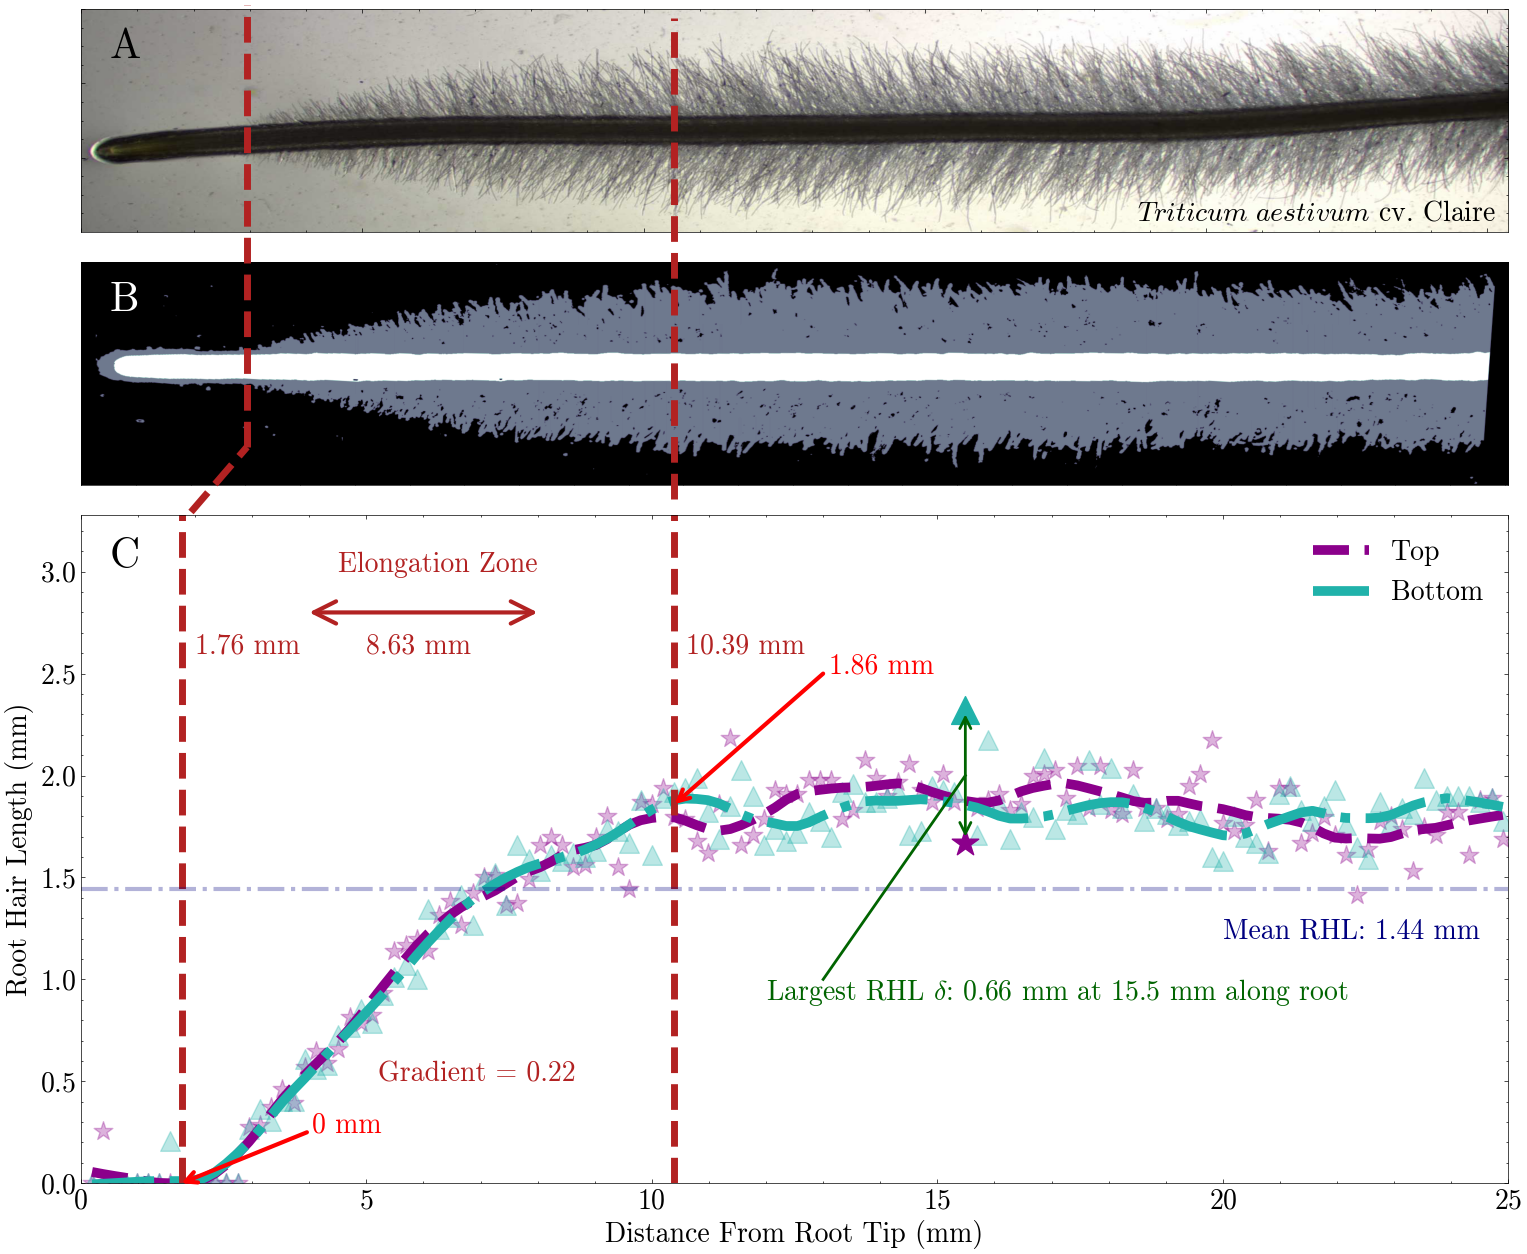

In [23]:
# Plot

fig, ax = plt.subplots(nrows=3, gridspec_kw={'height_ratios':(1,1,3)}, figsize=(16, 13))

# Show images
ax[0].imshow(np.rot90(claire_raw, k=3)[500:1100, 150:], aspect='auto')
ax[1].imshow(np.rot90(claire_mask, k=3)[600:1200, 150:], cmap='bone', aspect='auto')

# Plot scatter, lines and annotations
ax[2].scatter(x=claire15_raw['Distance From Root Tip (mm)'], 
            y=claire15_raw['RHL 1'],
            color='darkmagenta',
            marker='*',
            s=200,
            alpha=0.3,
            )
ax[2].scatter(x=claire15_raw['Distance From Root Tip (mm)'],
            y=claire15_raw['RHL 2'],
            color='lightseagreen',
            marker='^',
            alpha=0.3,
            s=200
            )
ax[2].plot(line1[:,0], line1[:,1], linewidth=7, linestyle='dashed', color='darkmagenta', label='Top') 
ax[2].plot(line2[:,0], line2[:,1], linewidth=7, linestyle='dashdot', color='lightseagreen', label='Bottom')
ax[2].plot((claire15_summary['Elongation Zone Start (mm)'], claire15_summary['Elongation Zone Start (mm)']), (0, 5), linewidth=5, linestyle='dashed', color='firebrick')
ax[2].plot((claire15_summary['Elongation Zone Stop (mm)'], claire15_summary['Elongation Zone Stop (mm)']), (0, 5),linewidth=5, linestyle='dashed', color='firebrick')
ax[2].plot((0,25 ), (claire15_summary['Avg RHL (mm)'], claire15_summary['Avg RHL (mm)']), linewidth=3, linestyle='dashdot', color='navy', alpha=0.3)
ax[2].plot((13,15.490),(1,2), color='darkgreen', linewidth=2)
ax[2].scatter(15.4901,1.667, color='darkmagenta', marker='*',s=400)
ax[2].scatter(15.4901,2.3235, color='lightseagreen', marker='^', s=400)

# annotations
ax[2].annotate(text='', xy=(4,2.8), xytext=(8,2.8), arrowprops=dict(arrowstyle='<->', shrinkA=0, shrinkB=0, linewidth=3, color='firebrick', mutation_scale=40))
ax[2].annotate(text='Elongation Zone', xy=(4.5,3), color='firebrick')
ax[2].annotate(text='8.63 mm', xy=(5, 2.6),  color='firebrick')
ax[2].annotate(text='1.76 mm', xy=(2, 2.6), color='firebrick')
ax[2].annotate(text='10.39 mm', xy=(10.6, 2.6), color='firebrick')
ax[2].annotate(text='', xy=(10.4,1.86), xytext=(13,2.5), arrowprops=dict(arrowstyle='->', shrinkA=0, shrinkB=0, linewidth=3, color='red', mutation_scale=20))
ax[2].annotate(text='1.86 mm', xy=(13.1, 2.5), color='red' )
ax[2].annotate(text='', xy=(1.76, 0), xytext=(3.96,0.25), arrowprops=dict(arrowstyle='->', shrinkA=0, shrinkB=0, linewidth=3, color='red', mutation_scale=20))
ax[2].annotate(text='0 mm', xy=(4.05, 0.25), color='red')
ax[2].annotate(text=r'Gradient = 0.22', xy=(5.2,0.5), color='firebrick')
ax[2].annotate(text='', xy=(claire15_summary['Max RHL Segment Delta Pos (mm)'], 1.7), xytext=(claire15_summary['Max RHL Segment Delta Pos (mm)'],2.3), arrowprops=dict(arrowstyle='<->', shrinkA=0, shrinkB=0, linewidth=2, color='darkgreen', mutation_scale=20))
ax[2].annotate(text=r'Largest RHL $\delta$: 0.66 mm at 15.5 mm along root', xy=(12, 0.9), color='darkgreen')
ax[2].annotate(text=r'Mean RHL: 1.44 mm', xy=(20, 1.2), color='navy')


# Set limits and ticks
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[2].set_ylim(0, max(claire15_raw['RHL 1']) * 1.5)
ax[2].set_xlim(0, 25)
ax[2].set_xlabel('Distance From Root Tip (mm)')
ax[2].set_ylabel('Root Hair Length (mm)')
ax[2].legend(loc='upper right')

# Add labels
ax[0].annotate('A', xy=(0.02, 0.78), xycoords='axes fraction', color='black', fontsize=30)
ax[0].annotate(r'$\it{Triticum \ aestivum}$ cv. Claire', xy=(0.74, 0.05), xycoords='axes fraction', fontsize=20)
ax[1].annotate('B', xy=(0.02, 0.78), xycoords='axes fraction', color='white', fontsize=30)
ax[2].annotate('C', xy=(0.02, 0.92), xycoords='axes fraction', color='black', fontsize=30)


# Add vertical lines between subplots
line = plt.Line2D((0.17,0.17), (0.64,0.98), transform=fig.transFigure, color='firebrick', linestyle='dashed', linewidth=5)
fig.add_artist(line)
line = plt.Line2D((0.437,0.437), (0.6,0.97), transform=fig.transFigure, color='firebrick', linestyle='dashed', linewidth=5)
fig.add_artist(line)
line = plt.Line2D((0.135,0.17), (0.59,0.64), transform=fig.transFigure, color='firebrick', linestyle='dashed', linewidth=5)
fig.add_artist(line)

plt.tight_layout()
plt.savefig('pyroothair_wheat_demo.pdf', format='pdf', dpi=300)


### Figure 3 - Trait Boxplots

In [ ]:
# DataFrames
summary_data = pd.read_csv('all_summary.csv')

summary_data_melted = pd.melt(summary_data,
                        value_vars=['Avg RHL (mm)', 'Max RHL (mm)',
       'Min RHL (mm)', 'Total RHD (mm2)', 'Max RHL Delta (mm)',
       'Max RHL Delta Pos (mm)', 'Max RHD Delta (mm2)',
       'Max RHD Delta Pos (mm)', 'Elongation Zone Distance (mm)',
       'Elongation Zone Start (mm)', 'Elongation Zone Stop (mm)',
       'Elongation Zone Gradient', 'Root Thickness (mm)', 'Root Length (mm)',
       'RH:Background Pixel Ratio'],
        id_vars=['Name', 'Batch_ID'])
summary_data_melted.sort_values(['Batch_ID', 'variable'], inplace=True)
summary_data_melted['Batch_ID'] = summary_data_melted['Batch_ID'].str.title()
summary_labels = list(summary_data_melted['Batch_ID'].unique())

# Set subplot titles
combined_titles = [r'Mean RHL (mm)',
          r'Elongation Zone Size (mm)',
          r'Elongation Zone Gradient',
          r'Elongation Zone Start Pos (mm)',
          r'Elongation Zone End Pos (mm)',
          r'Max RHD $\delta$ (mm$^{2}$)',
          r'Max RHD $\delta$ pos (mm)',
          r'Max RHL (mm)',
          r'Max RHL $\delta$ (mm)',
          r'Max RHL $\delta$ pos (mm)',
          r'Min RHL (mm)',
          r'RH:Background Pixel Ratio',
          r'Captured Sample Root Length (mm)',
          r'Root Thickness (mm)',
          r'Total RHD (mm$^{2}$)',
          r'']

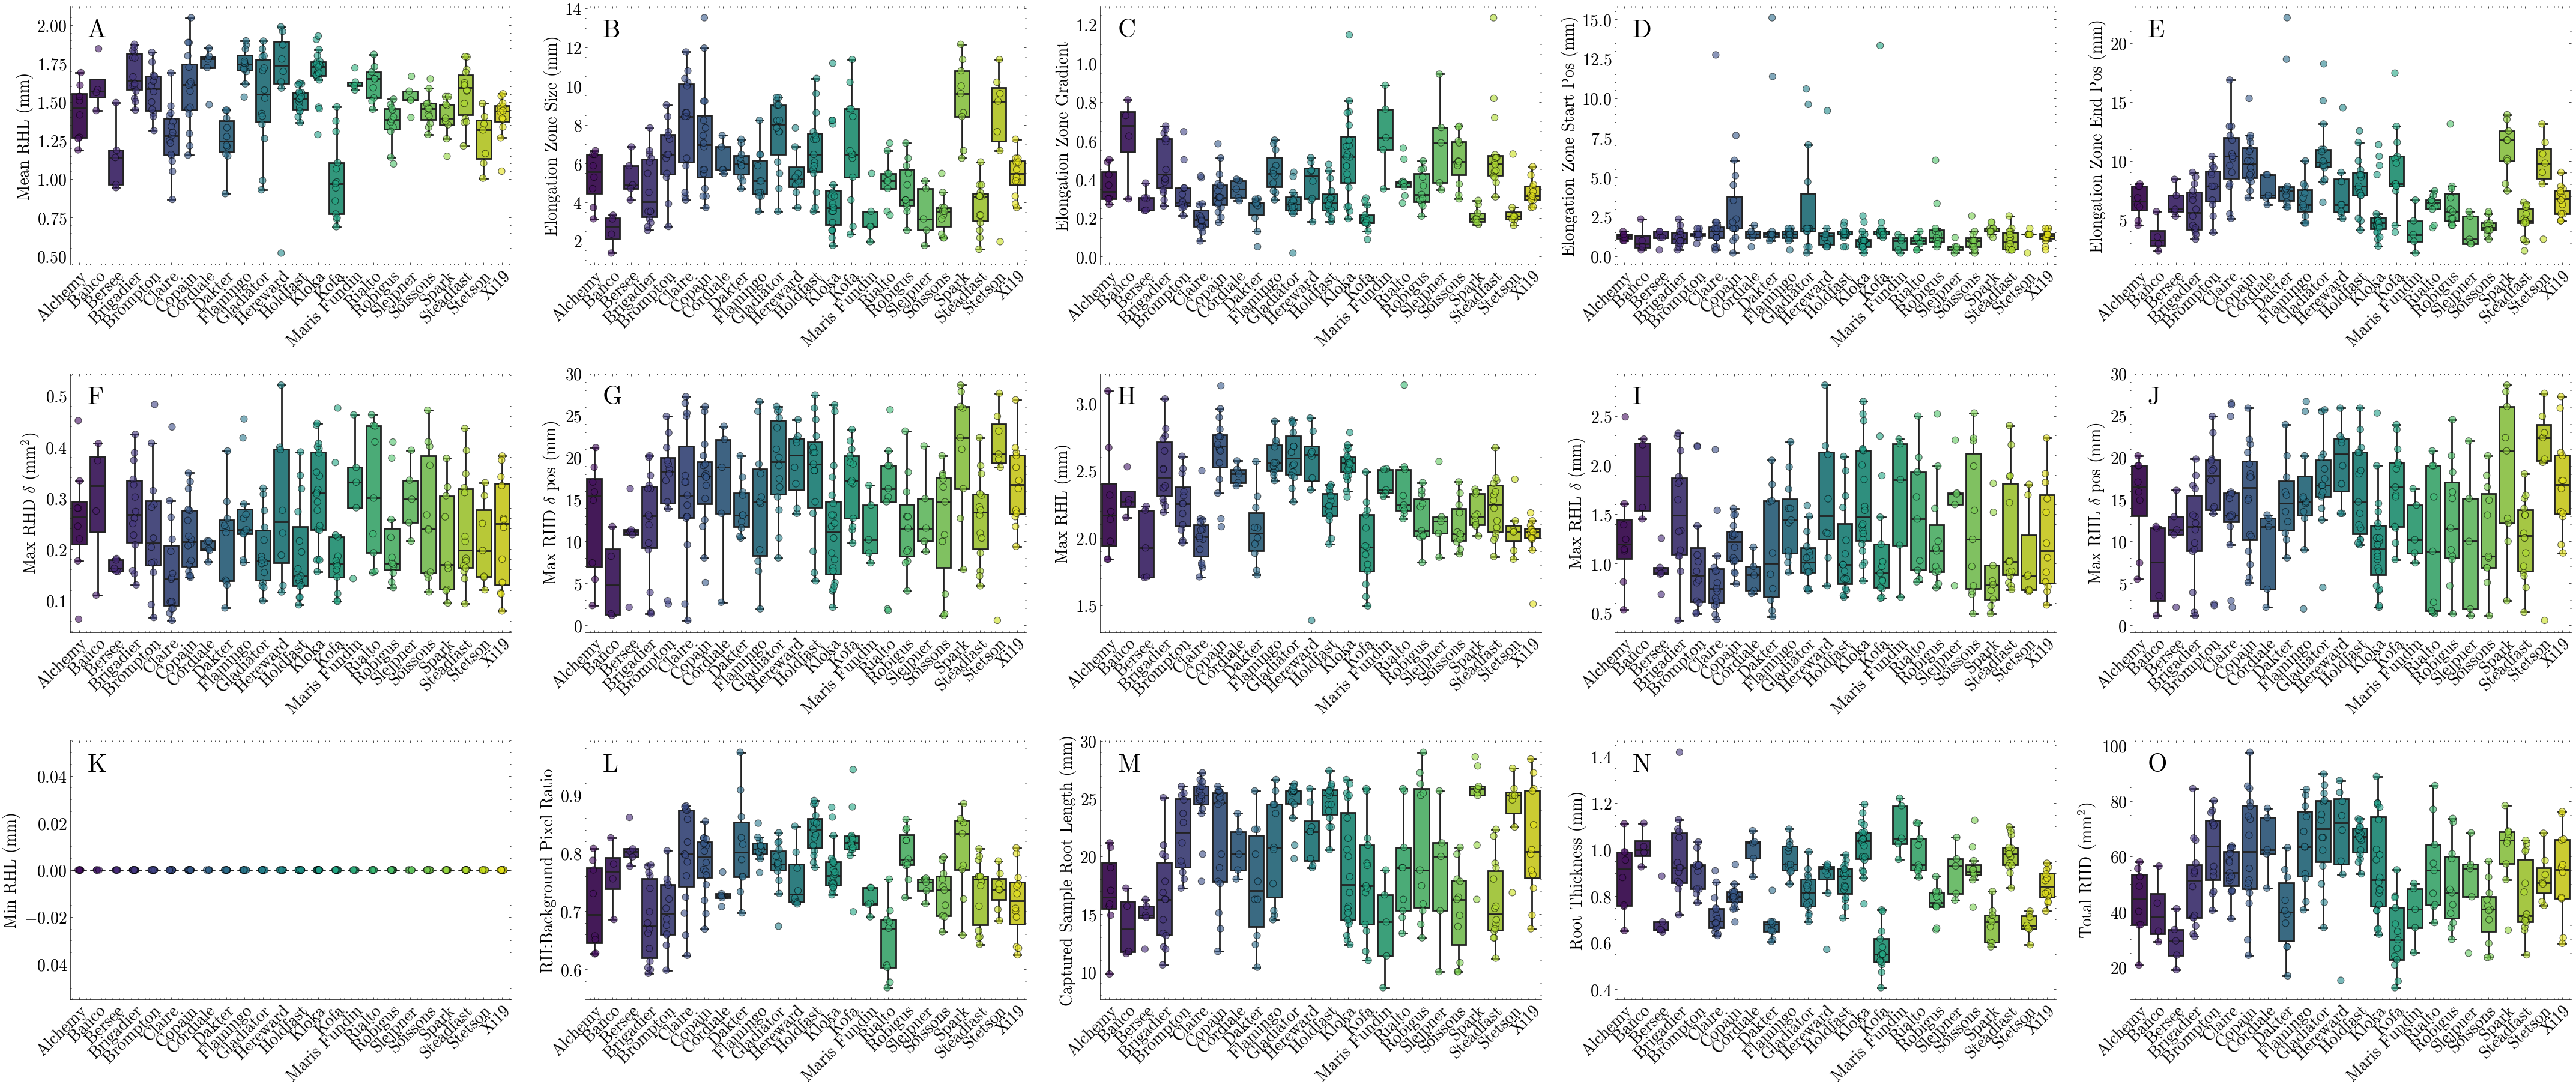

In [27]:
plt.rcParams['figure.figsize'] = (24,15)

# boxes
all_plot = sns.catplot(data=summary_data_melted,
            x='Batch_ID',
            y='value',
            col='variable',
            hue='Batch_ID',
            kind='box',
            palette='viridis',
            sharey=False,
            sharex=False,
            col_wrap=5,
            width=0.8,
            linewidth=2,
            height=6.2,
            aspect=1.4,
            legend=False,
            showfliers=False,
            )            

# scatterplot
for variable, z in zip(summary_data_melted['variable'].unique(), all_plot.axes.flat):
    subset_df = summary_data_melted[summary_data_melted['variable'] == variable]
    sns.stripplot(x='Batch_ID', 
                  y='value', 
                  data=subset_df,
                  hue='Batch_ID',
                  palette='viridis',
                  edgecolor='black',
                  linewidth=0.8,
                  size=8,
                  legend=False,
                  alpha=0.6,
                  ax=z)


plot_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
# set labels
for ax, title, label in zip(all_plot.axes.flat, combined_titles, plot_labels):
    ax.set_ylabel(title)
    ax.set_title('')
    ax.set_xlabel('')

    ax.set_xticks(summary_labels)
    ax.set_xticklabels(summary_labels, rotation=45, ha='right', rotation_mode='anchor', fontsize=20) 
    ax.text(0.04, 0.95, label, va='top', transform=ax.transAxes, fontsize=30, weight='bold')

plt.subplots_adjust(wspace=0.15)
plt.tight_layout()
plt.savefig('all_traits.pdf', format='pdf', dpi=400)

### Figure 4 - Correlation Matrix

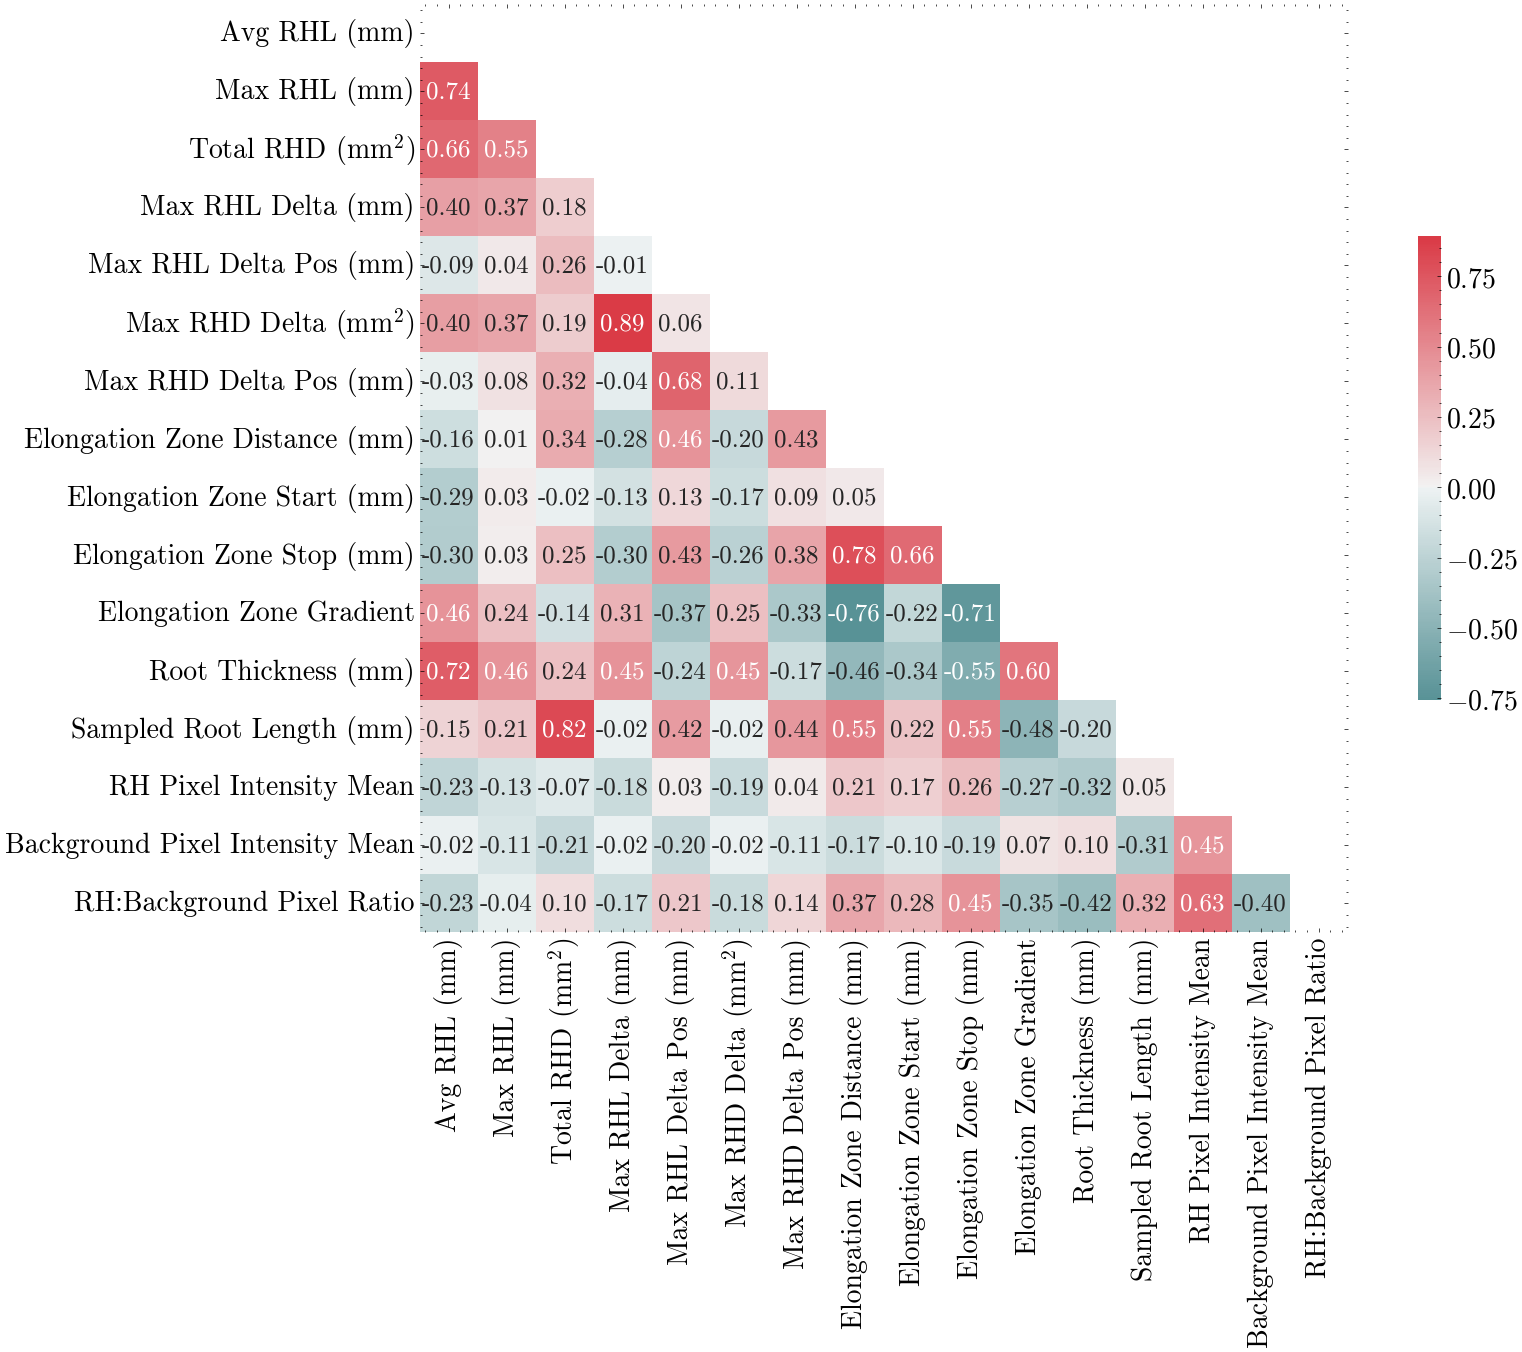

In [43]:
fig, ax = plt.subplots(figsize=(20,16))

plt.gcf().subplots_adjust(bottom=0.3, left=0.2)
heatmap_df = summary_data.drop(['Min RHL (mm)', 'Name', 'Unnamed: 0'], axis=1).set_index(['Batch_ID'])
heatmap_df = heatmap_df.rename(columns={'Total RHD (mm2)': r'Total RHD (mm$^{2}$)',
                           'Root Length (mm)': 'Sampled Root Length (mm)',
                           'Max RHD Delta (mm2)': r'Max RHD Delta (mm$^{2}$)'})
corr = heatmap_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(200,10, as_cmap=True), center=0, square=True, cbar_kws={'shrink':.5}, annot=True, fmt='.2f', annot_kws={'fontsize': 18})
plt.savefig('corr_matrix.pdf', format='pdf', dpi=200)


### Figure 5 - Root Tip Variation and Clustering

In [ ]:
# Data

raw_df = pd.read_csv('all_raw.csv')
raw_df.drop(['Unnamed: 0'], axis=1, inplace=True)
raw_df[['Genotype', 'Rep', 'NA']] = raw_df['Name'].str.split('_', expand=True)
raw_df = raw_df.set_index('Genotype').drop(['NA'], axis=1)
raw_df.drop(['Name'], axis=1, inplace=True)

# subset for first 10 cm
raw_df_10cm = raw_df[raw_df['Distance From Root Tip (mm)'] <= 10]
raw_df_10cm['RHL_Avg'] = raw_df_10cm[['RHL 1', 'RHL 2']].mean(axis=1)
raw_df_10cm.sort_index(inplace=True)

/tmp/ipykernel_55835/3025407697.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_10cm['RHL_Avg'] = raw_df_10cm[['RHL 1', 'RHL 2']].mean(axis=1)
/tmp/ipykernel_55835/3025407697.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_10cm.sort_index(inplace=True)


Distance From Root Tip (mm)     RHL 1     RHL 2     RHD 1     RHD 2  \
Genotype                                                                        
soissons                    18.039216  1.460784  0.852941  0.239427  0.000000   
soissons                    17.843137  1.333333  1.107843  0.239619  0.131103   
soissons                    17.647059  1.450980  1.539216  0.271050  0.245963   
soissons                    17.450980  1.647059  1.176471  0.292099  0.208189   
soissons                    17.254902  1.696078  1.294118  0.300654  0.230873   
...                               ...       ...       ...       ...       ...   
banco                        0.980392  0.000000  0.000000  0.000000  0.000000   
banco                        0.784314  0.000000  0.000000  0.000000  0.000000   
banco                        0.588235  0.000000  0.000000  0.000000  0.000000   
banco                        0.392157  0.000000  0.000000  0.000000  0.000000   
banco                        0.196078  0.000000  0.000000  0.000000  0.000000   

           Rep  
Genotype        
soissons  0013  
soissons  0013  
soissons  0013  
soissons  0013  
soissons  0013  
...        ...  
banco     0001  
banco     0001  
banco     0001  
banco     0001  
banco     0001  

[25695 rows x 6 columns]

In [ ]:
# determine which cultivars to annotate based on extremes at root tip
last_point = raw_df_10cm[raw_df_10cm['Distance From Root Tip (mm)'] == 10].reset_index()
last_point = last_point.drop(['Distance From Root Tip (mm)', 'RHL 1', 'RHL 2', 'RHD 1', 'RHD 2', 'Rep'], axis=1)
last_point = last_point.groupby(['Genotype']).mean().sort_values(by='RHL_Avg')


RHL_Avg
Genotype           
kofa       1.388655
bersee     1.426471
claire     1.440850
dakter     1.551961
gladiator  1.664216
stetson    1.665266
robigus    1.731283
alchemy    1.742997
soissons   1.744652
xi19       1.748217
holdfast   1.763399
spark      1.775910
hereward   1.805760
rialto     1.866558
slejpner   1.870588
maris      1.911765
brompton   1.933007
steadfast  1.933123
brigadier  1.935574
kloka      2.016422
banco      2.088235
cordiale   2.114706
flamingo   2.131016
copain     2.196943

In [60]:
# determine which cultivars to annotate
# grays -> cultivars to not annotate
# colors -> cultivars to annotate

gray_df = raw_df_10cm.reset_index()
gray_df = gray_df[~gray_df['Genotype'].isin(['kofa', 'bersee', 'claire', 'cordiale', 'flamingo', 'steadfast'])]

color_df = raw_df_10cm.reset_index()
color_df = color_df[color_df['Genotype'].isin(['kofa', 'bersee', 'claire', 'cordiale', 'flamingo', 'steadfast'])]

# set colormap
custom_colourmap = [
    "#7F3C8D", #bersee violet
    "#80BA5A", #claire olive green
    "#E73F74", #cordiale red
    ""
    "#3969AC", #flamingo blue
    "#11A579", #kofa green
    "#F2B701", #steadfast yellow
]

annotated_genotypes = ['kofa', 'bersee', 'claire', 'cordiale', 'flamingo', 'steadfast']

In [ ]:
# Agglomerative clustering to determine clusters

clustering = raw_df_10cm.reset_index()
clustering = clustering[['Genotype', 'Distance From Root Tip (mm)', 'RHL_Avg']]
grouped_df = clustering.groupby(['Genotype', 'Distance From Root Tip (mm)']).mean().reset_index()
genotype_list = list(clustering['Genotype'].unique())
grouped_df['Genotype'] = grouped_df['Genotype'].str.title()

genotype_key = {'alchemy': 0,
 'banco':1,
 'bersee':2,
 'brigadier':3,
 'brompton':4,
 'claire':5,
 'copain':6,
 'cordiale':7,
 'dakter':8,
 'flamingo':9,
 'gladiator':10,
 'hereward':11,
 'holdfast':12,
 'kloka':13,
 'kofa':14,
 'maris':15,
 'rialto':16,
 'robigus':17,
 'slejpner':18,
 'soissons':19,
 'spark':20,
 'steadfast':21,
 'stetson':22,
 'xi19':23}

grouped_df = grouped_df.pivot(columns='Distance From Root Tip (mm)', index='Genotype', values='RHL_Avg')
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.replace({"Genotype": genotype_key}) # code genotypes with numbers
features = grouped_df.drop('Genotype', axis=1)
features = features.to_numpy()

clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(features)
labels = [i.title() for i in genotype_key]

# function to plot dendogram from skimage
def plot_dendrogram(model, ax=ax, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs, orientation='top', labels=labels, leaf_font_size=18)
    ax.text(0.02, 0.95, 'B', va='top', transform=ax.transAxes, fontsize=24, weight='bold')
    ax.text(0.12, 0.5, 'Shallow Cluster', va='top', transform=ax.transAxes, fontsize=16)
    ax.text(0.8, 0.5, 'Steep Cluster', va='top', transform=ax.transAxes, fontsize=16)


In [ ]:
# function to plot variation
def plot_variation(ax):
        a = sns.lineplot(data=gray_df,
                x='Distance From Root Tip (mm)',
                y='RHL_Avg',
                hue='Genotype',
                palette=['silver'],
                markers=True,
                errorbar=None,
                linewidth=1.5,
                legend=False,
                alpha=0.7,
                ax=ax
                )
        a.set_ylabel('Mean RHL at Root Tip (mm)')

        sns.lineplot(data=color_df,
                        x='Distance From Root Tip (mm)',
                        y='RHL_Avg',
                        hue='Genotype',
                        palette=custom_colourmap,
                        markers=True,
                        errorbar=None,
                        linewidth=2.75,
                        legend=False,
                        ax=ax
                )
                        
        ax.text(10.32, 1.26, 'Kofa', color=custom_colourmap[4], fontsize=20,  va='center')
        ax.text(10.32, 1.44, 'Bersee', color=custom_colourmap[0], fontsize=20,  va='center')
        ax.text(10.32, 1.57, 'Claire', color=custom_colourmap[1], fontsize=20,  va='center')
        ax.text(10.32, 1.8, 'Steadfast', color=custom_colourmap[5], fontsize=20, va='center')
        ax.text(10.32, 2, 'Cordiale', color=custom_colourmap[2], fontsize=20,  va='center')
        ax.text(10.32, 2.2, 'Flamingo', color=custom_colourmap[3], fontsize=20,  va='center')

        start = 10.05
        end = 10.35
        pad = 0.05

        ax.plot([start, (start + end - pad) / 2, end - pad],
                [1.38, 1.26,1.26],
                color=custom_colourmap[4],
                ls='dashed',
                linewidth=2)
        ax.plot([start, (start + end - pad) / 2, end - pad],
                [1.426, 1.44,1.44],
                color=custom_colourmap[0],
                ls='dashed',
                linewidth=2)
        ax.plot([start, (start + end - pad) / 2, end - pad],
                [1.44, 1.57,1.57],
                color=custom_colourmap[1],
                ls='dashed',
                linewidth=2)
        ax.plot([start, (start + end - pad) / 2, end - pad],
                [2.11, 2,2],
                color=custom_colourmap[2],
                ls='dashed',
                linewidth=2)
        ax.plot([start, (start + end - pad) / 2, end - pad],
                [2.14, 2.2,2.2],
                color=custom_colourmap[3],
                ls='dashed',
                linewidth=2)
        ax.plot([start, (start + end - pad) / 2, end - pad],
                [1.93, 1.8,1.8],
                color=custom_colourmap[5],
                ls='dashed',
                linewidth=2)

        ax.set_xlim(0, 11.5)
        ax.text(0.02, 0.97, 'A', va='top', transform=ax.transAxes, fontsize=24, weight='bold')



/tmp/ipykernel_55835/579414709.py:3: UserWarning: 
The palette list has fewer values (1) than needed (18) and will cycle, which may produce an uninterpretable plot.
  a = sns.lineplot(data=gray_df,


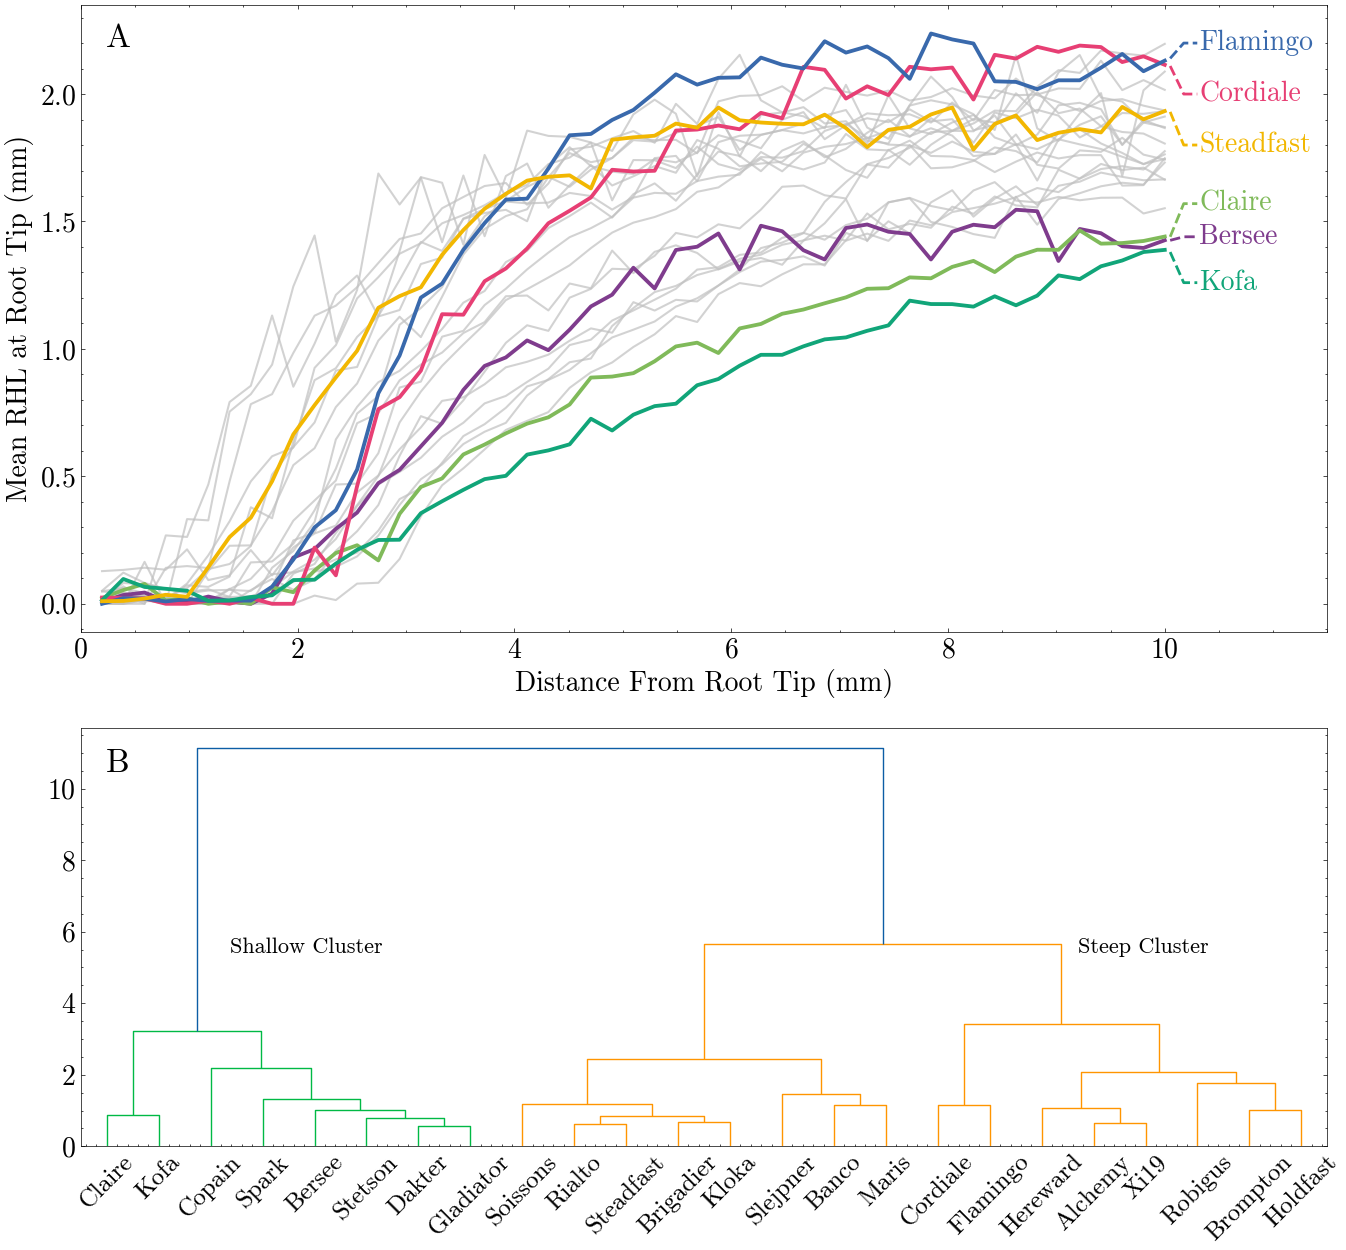

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,13), gridspec_kw={'height_ratios':[1.5,1]})
plot_variation(ax=ax[0])
plot_dendrogram(clustering, ax=ax[1])
plt.tight_layout()
plt.savefig('root_tip_clustering.pdf', dpi=300, format='pdf')



### Figure 6 - Species Demo

In [ ]:
# Load in all images
rice_data = pd.read_csv('rice_raw.csv')
rice_mask = iio.imread('nipponbare_1_mask.png')
rice_raw = iio.imread('nipponbare_stitch_0001.1.png')


oat_data = pd.read_csv('oat_raw.csv')
oat_mask = iio.imread('saladin_0003_mask.png')
oat_raw = iio.imread('saladin_0003.png')

teff_raw = iio.imread('tef_0001.png')
teff_mask = iio.imread('tef_0001_mask.png')
teff_data = pd.read_csv('teff_raw.csv')

tomato_raw = iio.imread('tomato_stitch.png')
tomato_mask = iio.imread('tomato_stitch_mask.png')
tomato_data = pd.read_csv('tomato_raw.csv')

In [67]:
# calculate and plot rhl regressions
def plot_rhls(df, ax):
    smooth_1_rhl = lowess(df['RHL 1'], df['Distance From Root Tip (mm)'], frac=0.1)
    smooth_2_rhl = lowess(df['RHL 2'], df['Distance From Root Tip (mm)'], frac=0.1)
    ax.scatter(x=df['Distance From Root Tip (mm)'], y=df['RHL 1'], color='darkmagenta', marker='*', alpha=0.3)
    ax.scatter(x=df['Distance From Root Tip (mm)'], y=df['RHL 2'], color='lightseagreen', marker='X', alpha=0.3)
    ax.plot(smooth_1_rhl[:, 0], smooth_1_rhl[:, 1], color='darkmagenta', linewidth=4, linestyle='dashed', label='Top')
    ax.plot(smooth_2_rhl[:, 0], smooth_2_rhl[:, 1], color='lightseagreen', linewidth=4, linestyle='dashdot', label='Bottom')

# gridspec sub fig function
def subfigs(fig, gs, raw, mask, df, aspect, label, xlab, lab_x, lab_y, ylab, legend):
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    ax3 = fig.add_subplot(gs[2])
    
    fig.subplots_adjust(hspace=0.04)
    
    ax1.imshow(np.rot90(raw, k=3), aspect=aspect)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.imshow(np.rot90(mask, k=3), cmap='bone', aspect=aspect)
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    plot_rhls(df, ax=ax3)
    if xlab:
        ax3.set_xlabel('Distance From Root Tip (mm)')
    if ylab:
        ax3.set_ylabel('Root Hair Length (mm)')
    ax3.text(lab_x, lab_y, label, fontsize=24)
    if legend:
        ax3.legend(loc='lower right', fancybox=True, frameon=True)

# clean up axes for each gridspec plot
def clean_ax(ax):
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines.left.set_visible(False)
    ax.spines.right.set_visible(False)


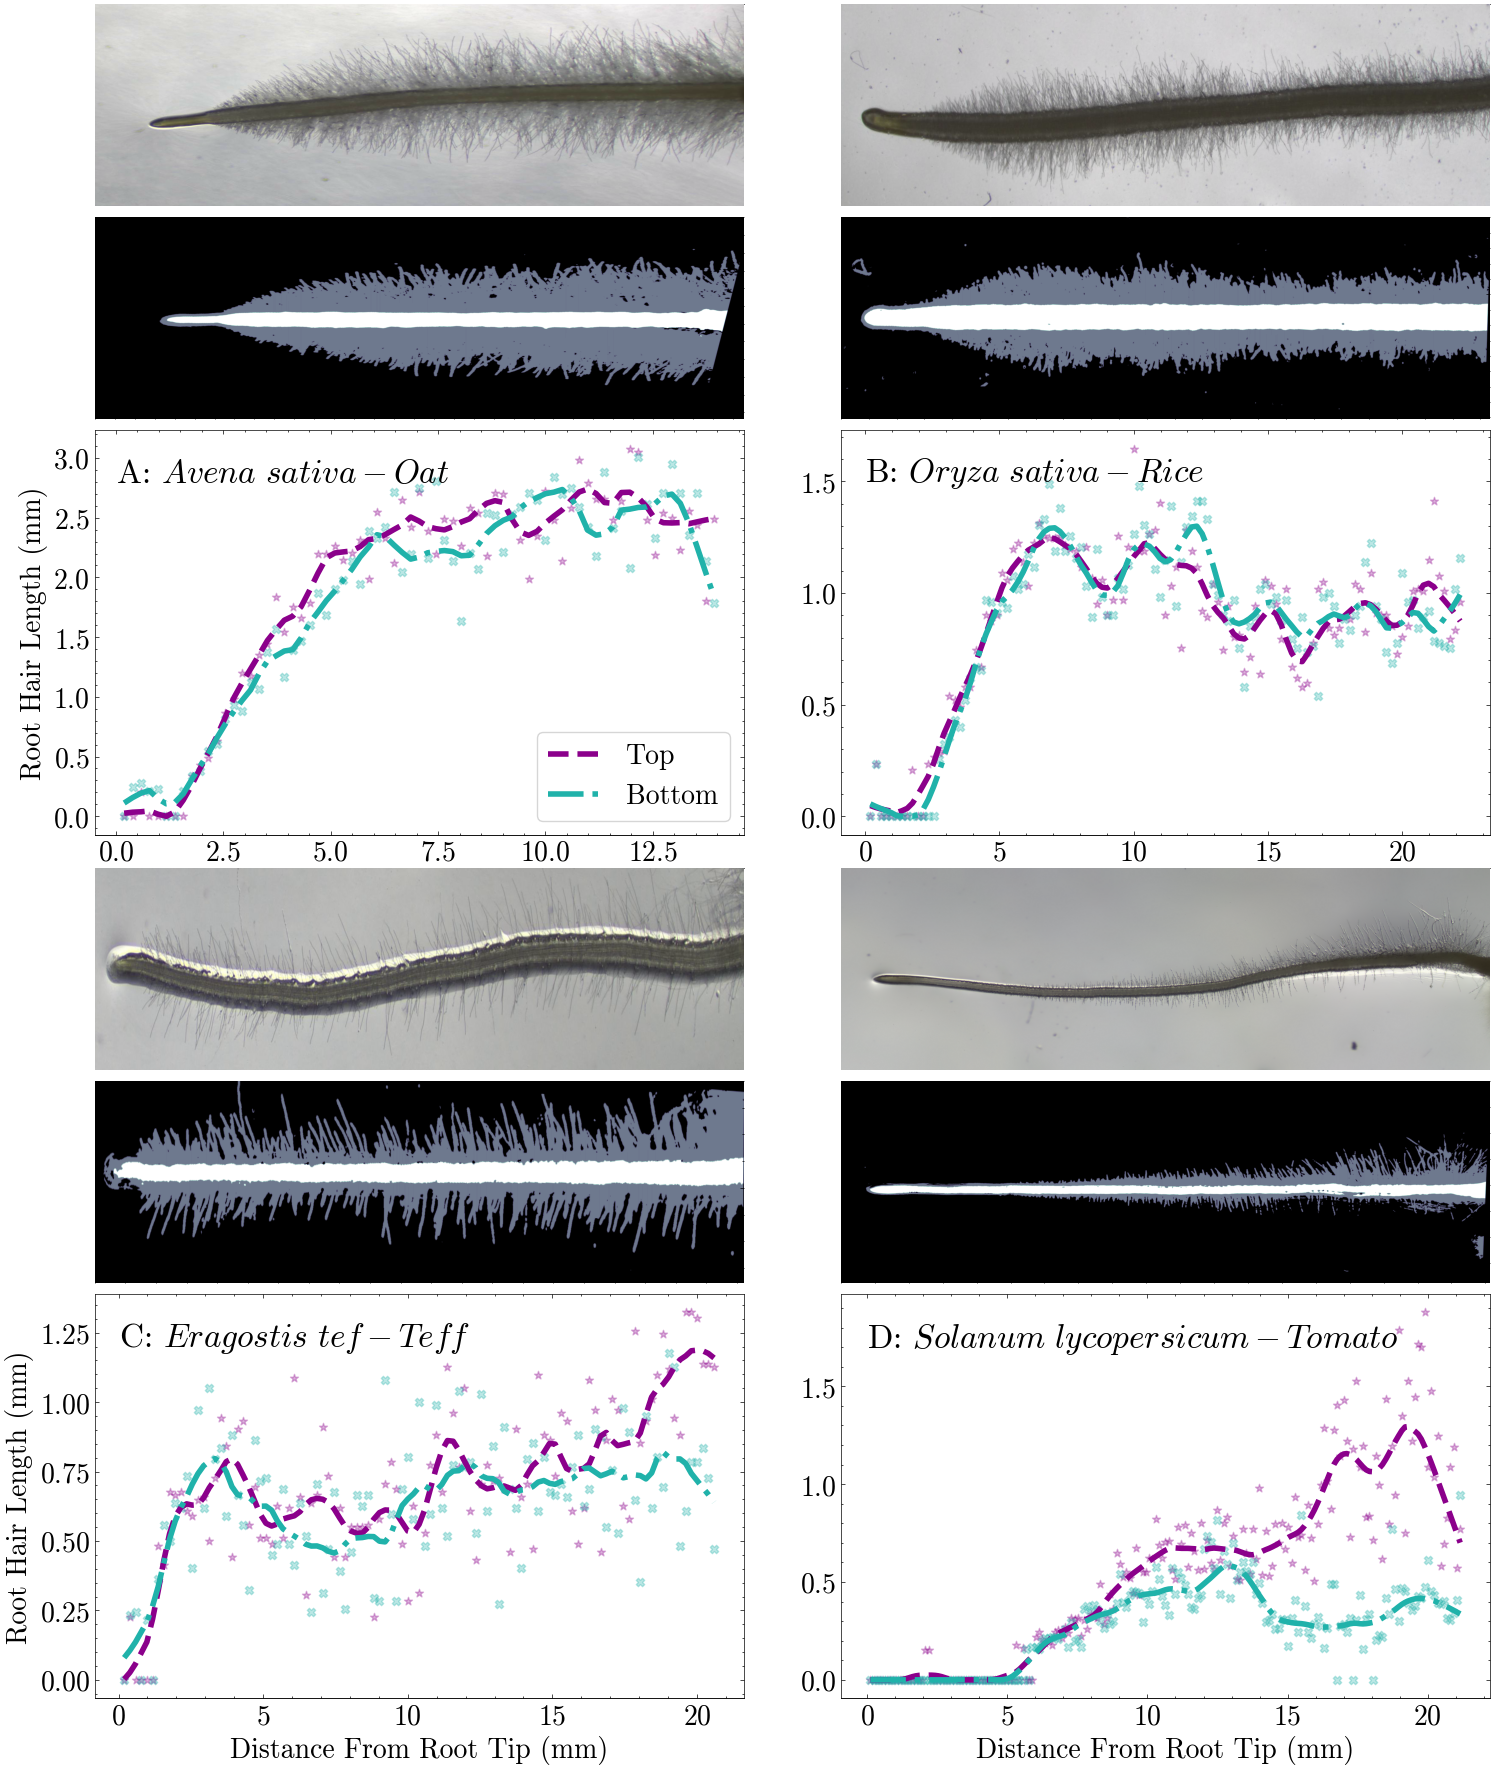

In [70]:
fig = plt.figure(figsize=(18,22))
gs = GridSpec(2,2,height_ratios=[1,1])
fig.subplots_adjust(wspace=0.15, hspace=100)

ax1 = fig.add_subplot(gs[0])
clean_ax(ax1)
subfigs(fig, gs[0].subgridspec(3,1, height_ratios=[0.4,0.4,0.8]), oat_raw, rgb2gray(oat_mask.copy()[:,:,:3]), oat_data, 'auto',  r'A: $\it{Avena\ sativa} - Oat$', False, 0,2.8, True, True)

ax2 = fig.add_subplot(gs[1])
clean_ax(ax2)
subfigs(fig, gs[1].subgridspec(3,1, height_ratios=[0.4,0.4,0.8]), rice_raw, rgb2gray(rice_mask.copy()[:,:,:3]), rice_data, 'auto',  r'B: $\it{Oryza\ sativa} - Rice$', False, 0,1.5, False, False)

ax3 = fig.add_subplot(gs[2])
clean_ax(ax3)
subfigs(fig, gs[2].subgridspec(3,1, height_ratios=[0.4,0.4,0.8]), teff_raw, rgb2gray(teff_mask.copy()[:,:,:3]), teff_data, 'auto', r'C: $\it{Eragostis\ tef} - Teff$', True, 0, 1.2, True, False)


ax4 = fig.add_subplot(gs[3])
clean_ax(ax4)
subfigs(fig, gs[3].subgridspec(3,1, height_ratios=[0.4,0.4,0.8]), tomato_raw, rgb2gray(tomato_mask.copy()[:,:,:3]), tomato_data, 'auto',r'D: $\it{Solanum\ lycopersicum} - Tomato$', True, 0, 1.7, False,False)


### Figure 7 - Correlation Plots

In [ ]:
# Load Data
rh_data = pd.read_excel('manual_measurements.xlsx')
root_data = pd.read_excel('manual_measurements.xlsx', sheet_name='Root Length')
elongation_data = pd.read_excel('manual_measurements.xlsx', sheet_name='Elongation')

In [ ]:
def plot_corr(df, x, y, ax, xlab, ylab, label):
    z = sns.regplot(df,
            x=x,
            y=y,
            ci=99,
            color='.3',
            marker='o',
            line_kws=dict(color='r'),
            scatter_kws={'s':80},
            ax=ax
            )
    slope, intercept, r, p, stderr = linregress(df[y], df[x])

    rsq = r ** 2

    # z.grid(True)
    z.set_xlabel(xlab)
    z.set_ylabel(ylab)
    ax.text(0.07, 0.95, label, va='top', transform=ax.transAxes,weight='bold')

    z.text(0.1, 0.8, f'$R^{2} = {rsq:.2f}$', transform=z.transAxes)


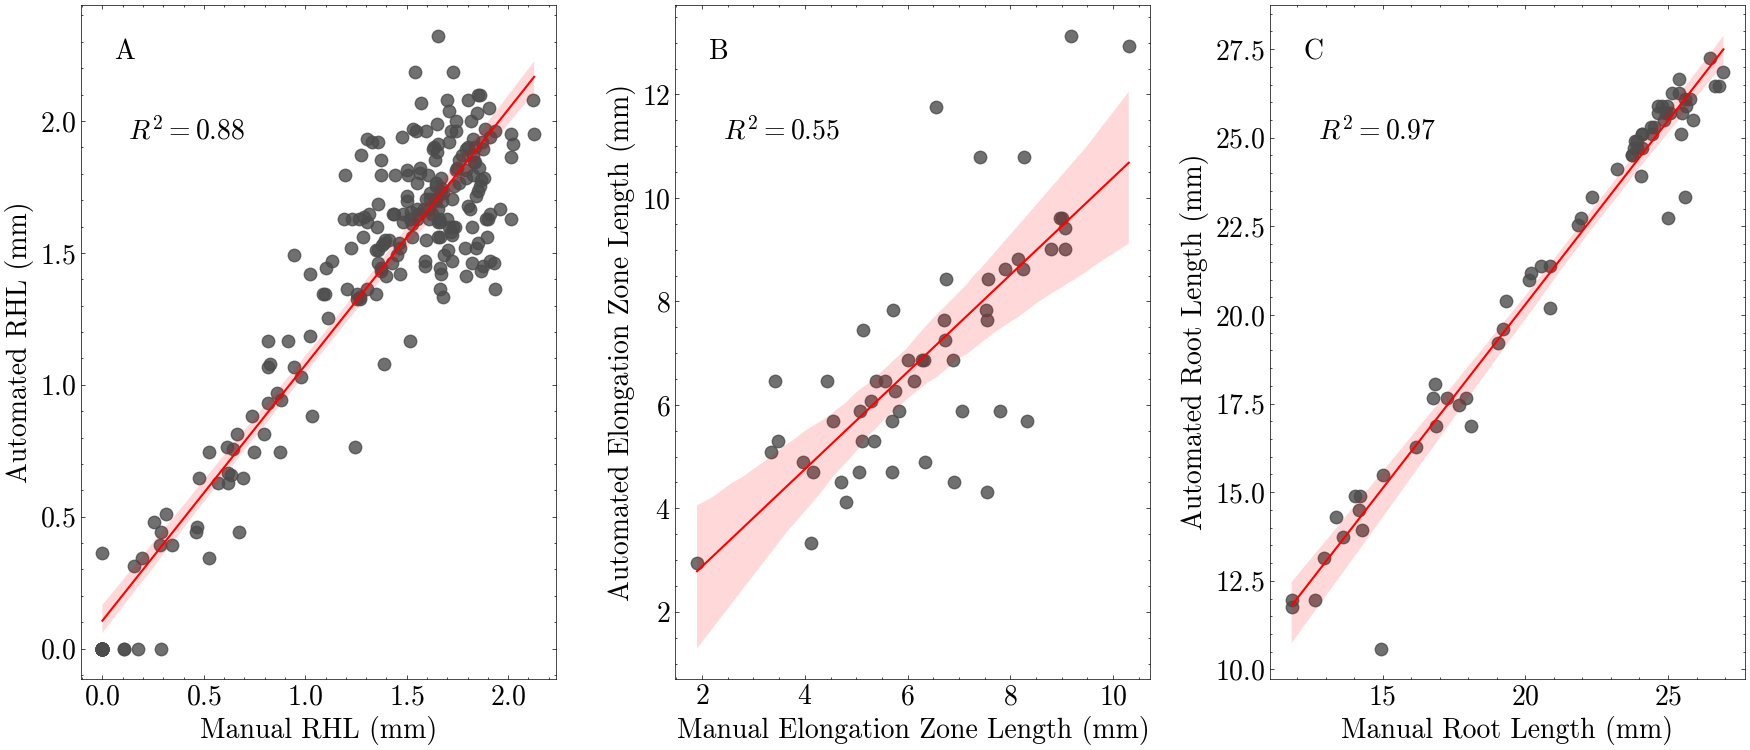

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
plot_corr(rh_data, 'rhl_manual', 'rhl_auto', ax[0], 'Manual RHL (mm)', 'Automated RHL (mm)', 'A')
plot_corr(elongation_data, 'manual_elongation', 'auto_elongation', ax[1], 'Manual Elongation Zone Length (mm)', 'Automated Elongation Zone Length (mm)', 'B')
plot_corr(root_data, 'manual_root_length', 'auto_root_length', ax[2], 'Manual Root Length (mm)', 'Automated Root Length (mm)', 'C')
plt.tight_layout()
plt.savefig('correlation_plots.pdf', format='pdf', dpi=200)


### Supplementary Figure 1 - GPU vs RFC Pipeline

In [ ]:
# Load data

# Pipleine Run Time Data
time = pd.read_excel('GPU_VS_RFC_TIME.xlsx')
time.rename(columns={'CUMULATIVE_TIME_GPU': 'GPU',
                            'CUMULATIVE_TIME_RFC': 'RFC',
                            'CUMULATIVE_TIME_NOGPU': 'CPU'}, inplace=True)
time_melted = pd.melt(time, id_vars=['Genotype'], value_vars=['GPU_TIME_PER_IMAGE', 'RFC_TIME_PER_IMAGE', 'NOGPU_TIME_PER_IMAGE'])

gpu_only = time_melted[time_melted['variable'] == 'GPU_TIME_PER_IMAGE']                             
rfc_only = time_melted[time_melted['variable'] == 'RFC_TIME_PER_IMAGE']
nogpu_only = time_melted[time_melted['variable'] == 'NOGPU_TIME_PER_IMAGE']

gpu_mean = gpu_only['value'].mean()
rfc_mean = rfc_only['value'].mean()
nogpu_mean = nogpu_only['value'].mean()

cum_time = pd.melt(time, id_vars=['Genotype'], value_vars=['GPU',	'CPU'	,'RFC'])

In [ ]:
# Gpu and RFC summary data
gpu = pd.read_csv('all_summary.csv')
rfc = pd.read_csv('all_summary_rfc.csv')

gpu.rename(columns={'Total RHD (mm2)': 'Total RHD (mm$^{2}$)'}, inplace=True)
rfc.rename(columns={'Total RHD (mm2)': 'Total RHD (mm$^{2}$)'}, inplace=True)

gpu.drop(['Unnamed: 0', 'Min RHL (mm)', 'Max RHD Delta (mm2)', 'Max RHL Delta (mm)'], axis=1, inplace=True)
rfc.drop(['Unnamed: 0', 'Min RHL (mm)', 'Max RHD Delta (mm2)', 'Max RHL Delta (mm)'], axis=1, inplace=True)

non_n_columns_rfc = rfc[['Name', 'Batch_ID']] # subset non numeric columns pre normalization
non_n_columns_gpu = gpu[['Name', 'Batch_ID']]

rfc_norm = rfc.drop(['Name', 'Batch_ID'], axis=1)
gpu_norm = gpu.drop(['Name', 'Batch_ID'], axis=1)

rfc_melt = pd.melt(rfc, id_vars=['Name', 'Batch_ID'])
gpu_melt = pd.melt(gpu, id_vars=['Name', 'Batch_ID'])

# Normalize data
normalized_rfc = (rfc_norm-rfc_norm.mean())/rfc_norm.std()
normalized_gpu = (gpu_norm-gpu_norm.mean())/gpu_norm.std()

rfc_norm = pd.concat([non_n_columns_rfc, normalized_rfc], axis=1) # add non numeric columns back post normalization
gpu_norm = pd.concat([non_n_columns_gpu, normalized_gpu], axis=1)

rfc_melt_norm = pd.melt(rfc_norm, id_vars=['Name', 'Batch_ID'])
gpu_melt_norm = pd.melt(gpu_norm, id_vars=['Name', 'Batch_ID'])

combined = gpu_melt.merge(rfc_melt, how='inner', on=['Name', 'variable'])
combined = combined.drop(['Batch_ID_x'], axis=1)

combined_norm = gpu_melt_norm.merge(rfc_melt_norm, how='inner', on=['Name', 'variable'])
combined_norm = combined_norm.drop(['Batch_ID_x'], axis=1)

In [82]:
# function to plot subplot A in S Fig 1
def time_box(fig, gs):

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1], sharex=ax1)

    fig.subplots_adjust(hspace=0.1)
    sns.boxplot(time_melted, y='value', x='variable', hue='variable', palette='viridis', width=0.4, linewidth=1.5, showfliers=False, ax=ax1)
    sns.stripplot(time_melted, x='variable', y='value', hue='variable', palette='viridis', alpha=0.3, linewidth=1, s=7, ax=ax1)

    sns.boxplot(time_melted, y='value', x='variable', hue='variable', palette='viridis', width=0.4, linewidth=1.5, showfliers=False, ax=ax2)
    sns.stripplot(time_melted, x='variable', y='value', hue='variable', palette='viridis', alpha=0.3, linewidth=1, s=7, ax=ax2)

    ax1.set_ylim(200,600)
    ax2.set_ylim(0, 15)

    d=.5
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    ax2.set_xlabel('Pipeline')
    ax2.set_xticks([0,1,2], ['GPU', 'RFC', 'CPU'])
    ax1.text(-0.15,520,'A', fontsize=24)
    ax2.text(-0.1, 15, f'{gpu_mean:.2f} s')
    ax2.text(0.89,15, f'{rfc_mean:.2f} s')
    ax2.text(1.85, 15, f'{nogpu_mean:.2f} s')

    ax1.spines.bottom.set_visible(False)
    ax2.spines.top.set_visible(False)
    ax1.xaxis.tick_top()
    ax2.xaxis.tick_bottom()

    ax1.tick_params(labeltop=False)  # don't put tick labels at the top
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax2.set_xlabel('')
    ax2.set_ylabel('')


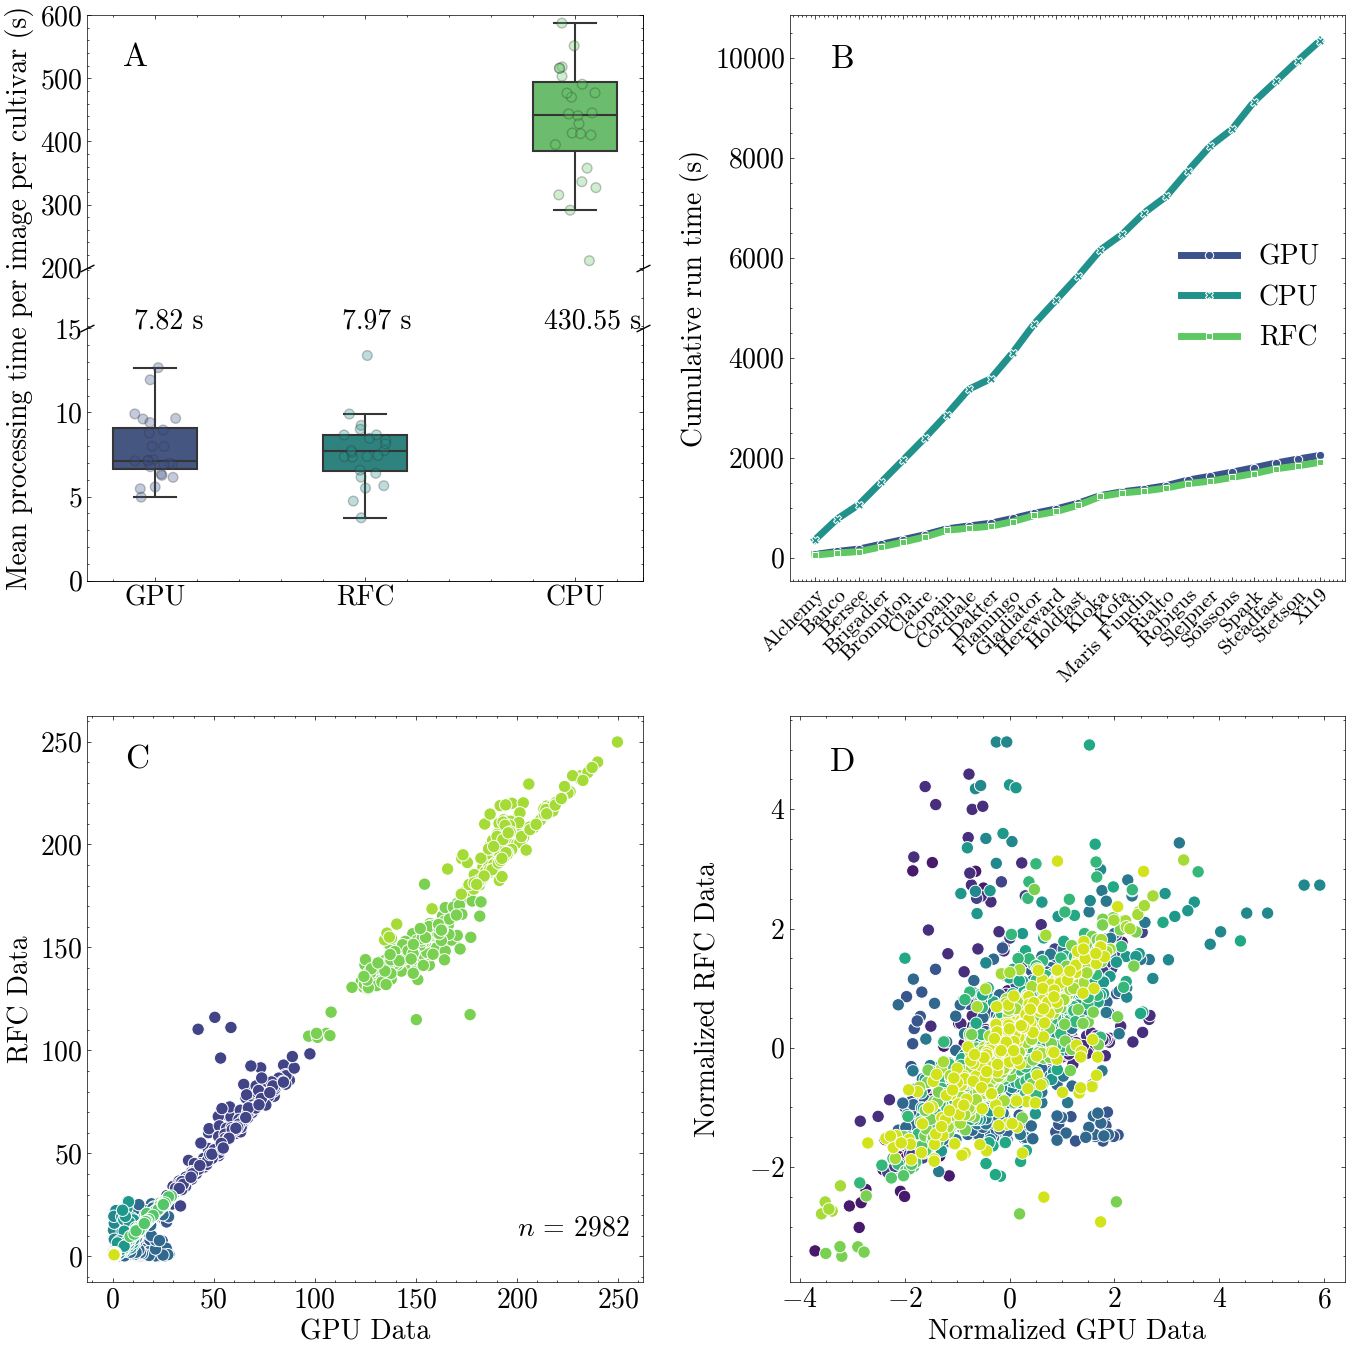

In [ ]:
fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.3, wspace=0.15)
gs = GridSpec(2,2, height_ratios=[1,1])

ax1 = fig.add_subplot(gs[0])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
time_box(fig, gs[0].subgridspec(2,1, height_ratios=[1,1]))
ax1.set_ylabel('Mean processing time per image per cultivar (s)', labelpad=35)

ax2 = fig.add_subplot(gs[1])
sns.lineplot(cum_time, x='Genotype', y='value', hue='variable', ax=ax2, palette='viridis', linewidth=5, style='variable', markers=True, legend='brief', dashes=False)
labels = list(time_melted['Genotype'].unique())
ax2.set_xticks(labels)
ax2.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor', fontsize=15)
ax2.legend(title='', loc='right')
ax2.set_ylabel('Cumulative run time (s)')
ax2.set_xlabel('')
ax2.text(0.7, 9800, 'B', fontsize=24)

ax3 = fig.add_subplot(gs[2])
sns.scatterplot(combined, x='value_x', y='value_y', hue='variable', palette='viridis', legend=False, ax=ax3, s=80)
ax3.set_xlabel('GPU Data')
ax3.set_ylabel('RFC Data')
ax3.text(6,237,'C', fontsize=24)
ax3.text(200, 10, fr'$n$ = {len(combined)}')

ax4 = fig.add_subplot(gs[3])
sns.scatterplot(combined_norm, x='value_x', y='value_y', hue='variable', palette='viridis', legend=False, ax=ax4, s=80)
ax4.set_xlabel('Normalized GPU Data')
ax4.set_ylabel('Normalized RFC Data', labelpad=20)
ax4.text(-3.43,4.65,'D', fontsize=24)
# ax3.legend(loc='upper center', bbox_to_anchor=(1.675, 1), fancybox=True, shadow=True, ncol=1, frameon=True)
plt.tight_layout()
plt.savefig('pipeline_speed_comparison.pdf', format='pdf', dpi=200)

### Supplementary Figure 3

In [ ]:
# Load images
mask_1 = iio.imread('brompton_0007.png')
mask_2 = iio.imread('copain_0004.png')
mask_3 = iio.imread('flamingo_0008.png')
mask_4 = iio.imread('kloka_0008.png')

raw_1 = iio.imread('brompton_0007.png')
raw_2 = iio.imread('copain_0004.png')
raw_3 = iio.imread('flamingo_0008.png')
raw_4 = iio.imread('kloka_0008.png')

gt_1 = iio.imread('brompton_0007_Simple Segmentation_.png')
gt_2 = iio.imread('copain_0004_Simple Segmentation_.png')
gt_3 = iio.imread('flamingo_0008_Simple Segmentation_.png')
gt_4 = iio.imread('kloka_0008_Simple Segmentation_.png')

In [ ]:
def convert_mask(mask):
    newmask = mask.copy()
    newmask[mask == 1] = 0
    newmask[mask ==2] = 1
    newmask[mask ==3] = 2

    mask = newmask
    return mask

# calculate intersection over union scores
def calculate_class_iou(predicted, truth, px_class):
    predicted_subset = predicted == px_class
    truth_subset = truth == px_class
    intersection = np.logical_and(predicted_subset, truth_subset).sum()
    union = np.logical_or(predicted_subset, truth_subset).sum()
    print(intersection, union)
    return intersection / union

rh_iou_1 = calculate_class_iou(mask_1, convert_mask(gt_1), 1)
rh_iou_2 = calculate_class_iou(mask_2, convert_mask(gt_2), 1)
rh_iou_3 = calculate_class_iou(mask_3, convert_mask(gt_3), 1)
rh_iou_4 = calculate_class_iou(mask_4, convert_mask(gt_4), 1)

847627 956918
731145 841136
671659 808282
764365 928405


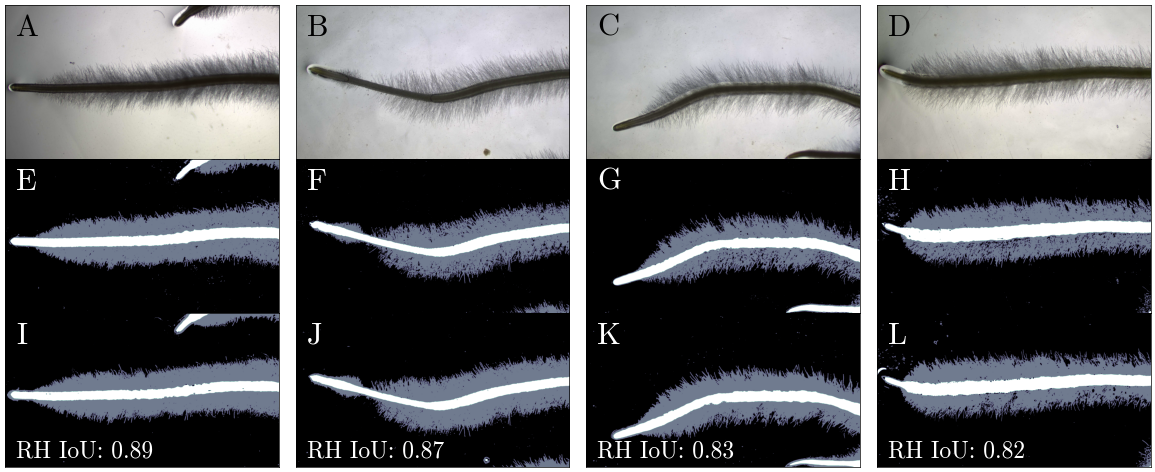

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,6))
plt.subplots_adjust(wspace=0,hspace=0)
ax[0,0].imshow(np.rot90(raw_1, k=3)) # raw images
ax[0,1].imshow(np.rot90(raw_2, k=3))
ax[0,2].imshow(np.rot90(raw_3, k=3))
ax[0,3].imshow(np.rot90(raw_4, k=3))

ax[1,0].imshow(np.rot90(gt_1, k=3), cmap='bone') # ground truths
ax[1,1].imshow(np.rot90(gt_2, k=3), cmap='bone')
ax[1,2].imshow(np.rot90(gt_3, k=3), cmap='bone')
ax[1,3].imshow(np.rot90(gt_4, k=3), cmap='bone')

ax[2,0].imshow(np.rot90(mask_1, k=3), cmap='bone') # predicted segmentation masks
ax[2,1].imshow(np.rot90(mask_2, k=3), cmap='bone')
ax[2,2].imshow(np.rot90(mask_3, k=3), cmap='bone')
ax[2,3].imshow(np.rot90(mask_4, k=3), cmap='bone')

for axs in ax.reshape(-1):
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    axs.set_xticks([])
    axs.set_yticks([])

ax[2,0].annotate(f'RH IoU: {rh_iou_1:.2f}', xy=(0.04, 0.06), xycoords='axes fraction', color='white', fontsize=17)
ax[2,1].annotate(f'RH IoU: {rh_iou_2:.2f}', xy=(0.04, 0.06), xycoords='axes fraction', color='white', fontsize=17)
ax[2,2].annotate(f'RH IoU: {rh_iou_3:.2f}', xy=(0.04, 0.06), xycoords='axes fraction', color='white', fontsize=17)
ax[2,3].annotate(f'RH IoU: {rh_iou_4:.2f}', xy=(0.04, 0.06), xycoords='axes fraction', color='white', fontsize=17)

labs = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

for ax, lab in zip(ax.flat, labs):
    if lab not in ['A', 'B', 'C', 'D']:
        ax.annotate(lab, xy=(0.04, 0.8), xycoords='axes fraction', fontsize=22, color='white')
    else:
        ax.annotate(lab, xy=(0.04, 0.8), xycoords='axes fraction', fontsize=22, color='black')

plt.savefig('iou_scores.pdf', format='pdf', dpi=100)

    